In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [6]:
!pip install tensorflow opencv-python numpy matplotlib seaborn scikit-learn


In [26]:
!pip install tensorflow 

In [93]:
# Image Preprocessing Function
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    image = cv2.GaussianBlur(image, (3, 3), 0)
    image = cv2.equalizeHist(image)  # Apply Histogram Equalization enhances contrast
    return image 
print("Hello")

Hello


In [95]:
# Load and preprocess dataset
def load_dataset(dataset_path="H:/Downloads/Gambo/Train"):
    images, labels = [], []
    for label, category in enumerate(['normal', 'dyslexic']):  # normal 0, dyslexic 1
        category_path = os.path.join(dataset_path, category)
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            images.append(preprocess_image(image_path))
            labels.append(label)
    return np.array(images).reshape(-1, 128, 128, 1), np.array(labels)

A


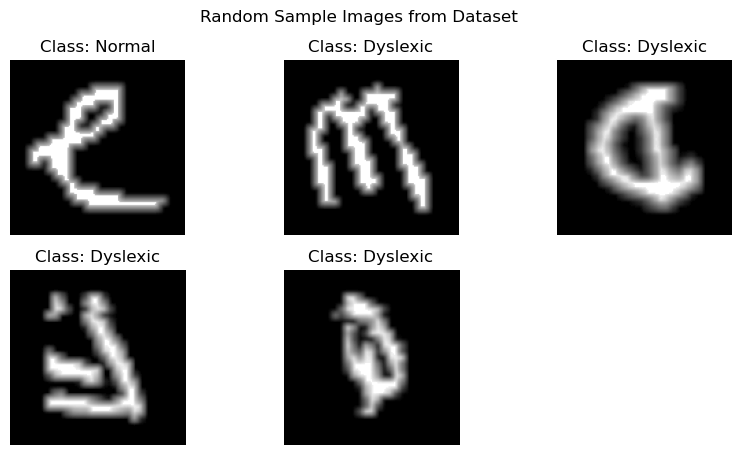

In [102]:
import random

# First, load the dataset
dataset_path = "H:/Downloads/Gambo/Train"  # Use your actual path
images, labels = load_dataset(dataset_path)

# Now shuffle the dataset
indices = list(range(len(images)))
random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# Visualization
plt.figure(figsize=(10, 5))
for i in range(5):  # Display 5 random images
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Class: {'Normal' if labels[i] == 0 else 'Dyslexic'}")
    plt.axis('off')

print('A')
plt.suptitle("Random Sample Images from Dataset")
plt.show()


In [154]:
# Capture all three generators
train_gen, val_gen, test_gen = get_data_generators()
print(f"Training images: {train_gen.samples}")
print(f"Validation images: {val_gen.samples}")
print(f"Test images: {test_gen.samples}")

Found 68893 images belonging to 2 classes.
Found 17222 images belonging to 2 classes.
Found 37439 images belonging to 2 classes.
Training images: 68893
Validation images: 17222
Test images: 37439


In [ ]:
# Main Execution
train_generator, validation_generator, test_generator = get_data_generators()

# Define CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.25),
        
        Conv2D(64, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.25),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

model.save('my_model.keras')

Found 68893 images belonging to 2 classes.
Found 17222 images belonging to 2 classes.
Found 37439 images belonging to 2 classes.
Epoch 1/30
2153/2153 ━━━━━━━━━━━━━━━━━━━━ 754s 349ms/step - accuracy: 0.8644 - loss: 0.3211 - val_accuracy: 0.8238 - val_loss: 0.4213
Epoch 2/30
2153/2153 ━━━━━━━━━━━━━━━━━━━━ 745s 346ms/step - accuracy: 0.9473 - loss: 0.1437 - val_accuracy: 0.8615 - val_loss: 0.3395
Epoch 3/30
2153/2153 ━━━━━━━━━━━━━━━━━━━━ 748s 347ms/step - accuracy: 0.9604 - loss: 0.1130 - val_accuracy: 0.8525 - val_loss: 0.4479
Epoch 4/30
 595/2153 ━━━━━━━━━━━━━━━━━━━━ 8:22 323ms/step - accuracy: 0.9646 - loss: 0.1007

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
# Generate predictions
y_true = np.array(test_generator.labels)
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Dyslexic'], yticklabels=['Normal', 'Dyslexic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Dyslexic']))